In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("Cryogenic Storage Tank Sales data.xlsx - Cryogenic sales data.csv")
df

,Row ID,Order ID,Ship Date,month_Year,Year,Ship Mode,Customer ID,Customer Name,Segment,Country,...,State,Postal Code,Region,Product ID,Product name,Sales in Thousands,Quantity,Discount,Profit,month
0,1,CA-2016-152156,11-11-2022,2022-11,2022.0,Second Class,CG-12520,Claire Gute,Consumer,United States,...,Kentucky,42420,South,FUR-BO-10001798,Cryogenic storage tanks,261.9600,2,0.00,41.9136,11
1,2,CA-2016-152156,11-11-2022,2022-11,2022.0,Second Class,CG-12520,Claire Gute,Consumer,United States,...,Kentucky,42420,South,FUR-CH-10000454,Cryogenic storage tanks,731.9400,3,0.00,219.5820,11
2,3,CA-2016-138688,16-06-2022,2022-06,2022.0,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,...,California,90036,West,OFF-LA-10000240,Cryogenic storage tanks,14.6200,2,0.00,6.8714,6
3,4,US-2015-108966,18-10-2021,2021-10,2021.0,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,Florida,33311,South,FUR-TA-10000577,Cryogenic storage tanks,957.5775,5,0.45,-383.0310,10
4,5,US-2015-108966,18-10-2021,2021-10,2021.0,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,Florida,33311,South,OFF-ST-10000760,Cryogenic storage tanks,22.3680,2,0.20,2.5164,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,23-01-2020,2020-01,2020.0,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,...,Florida,33180,South,FUR-FU-10001889,Cryogenic storage tanks,25.2480,3,0.20,4.1028,1
9990,9991,CA-2017-121258,03-03-2023,2023-03,2023.0,Standard Class,DB-13060,Dave Brooks,Consumer,United States,...,California,92627,West,FUR-FU-10000747,Cryogenic storage tanks,91.9600,2,0.00,15.6332,3
9991,9992,CA-2017-121258,03-03-2023,2023-03,2023.0,Standard Class,DB-13060,Dave Brooks,Consumer,United States,...,California,92627,West,TEC-PH-10003645,Cryogenic storage tanks,258.5760,2,0.20,19.3932,3
9992,9993,CA-2017-121258,03-03-2023,2023-03,2023.0,Standard Class,DB-13060,Dave Brooks,Consumer,United States,...,California,92627,West,OFF-PA-10004041,Cryogenic storage tanks,29.6000,4,0.00,13.3200,3


In [3]:
df.rename(columns={"Sales in Thousands":"sales"},inplace=True)
df.head()

,Row ID,Order ID,Ship Date,month_Year,Year,Ship Mode,Customer ID,Customer Name,Segment,Country,...,State,Postal Code,Region,Product ID,Product name,sales,Quantity,Discount,Profit,month
0,1,CA-2016-152156,11-11-2022,2022-11,2022.0,Second Class,CG-12520,Claire Gute,Consumer,United States,...,Kentucky,42420,South,FUR-BO-10001798,Cryogenic storage tanks,261.9600,2,0.00,41.9136,11
1,2,CA-2016-152156,11-11-2022,2022-11,2022.0,Second Class,CG-12520,Claire Gute,Consumer,United States,...,Kentucky,42420,South,FUR-CH-10000454,Cryogenic storage tanks,731.9400,3,0.00,219.5820,11
2,3,CA-2016-138688,16-06-2022,2022-06,2022.0,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,...,California,90036,West,OFF-LA-10000240,Cryogenic storage tanks,14.6200,2,0.00,6.8714,6
3,4,US-2015-108966,18-10-2021,2021-10,2021.0,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,Florida,33311,South,FUR-TA-10000577,Cryogenic storage tanks,957.5775,5,0.45,-383.0310,10
4,5,US-2015-108966,18-10-2021,2021-10,2021.0,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,Florida,33311,South,OFF-ST-10000760,Cryogenic storage tanks,22.3680,2,0.20,2.5164,10


In [4]:
df1 = df[["sales",'month_Year']]
df1.head()

,sales,month_Year
0,261.9600,2022-11
1,731.9400,2022-11
2,14.6200,2022-06
3,957.5775,2021-10
4,22.3680,2021-10


In [5]:
df2 = df[["sales",'month']]
df2.head()

,sales,month
0,261.9600,11
1,731.9400,11
2,14.6200,6
3,957.5775,10
4,22.3680,10


In [6]:
df2.isnull().sum()

sales    0
month    0
dtype: int64

In [7]:
sales_by_year = df1.groupby('month_Year')['sales'].sum()
sales_by_year

month_Year
2020-01     13275.1310
2020-02      5406.5280
2020-03     50708.3490
2020-04     30388.4650
2020-05     22478.8800
2020-06     35991.6556
2020-07     32990.5940
2020-08     30245.2420
2020-09     73126.6533
2020-10     35741.4770
2020-11     80182.1947
2020-12     59848.0235
2021-01     29594.7606
2021-02     12679.0770
2021-03     39269.6620
2021-04     25515.2535
2021-05     32587.9535
2021-06     29850.8300
2021-07     30400.2270
2021-08     28116.3142
2021-09     69615.8350
2021-10     32575.7155
2021-11     70634.8500
2021-12     78602.0237
2022-01     19130.0570
2022-02     26954.0850
2022-03     48795.9100
2022-04     41028.2980
2022-05     46520.1840
2022-06     48272.7220
2022-07     37595.9470
2022-08     32031.5793
2022-09     70460.8006
2022-10     60858.1993
2022-11     74664.1848
2022-12    105013.7860
2023-01     42297.0440
2023-02     23506.7824
2023-03     52891.3850
2023-04     40021.6803
2023-05     44774.9324
2023-06     47220.4981
2023-07     47183.8730


In [8]:
sales_by_month = df2.groupby('month')['sales'].sum()
sales_by_month

month
1     109456.6894
2      68546.4724
3     191665.3060
4     136953.6968
5     146361.9499
6     161335.7057
7     148170.6410
8     154153.1555
9     304631.1559
10    204727.0530
11    330681.7425
12    340517.2922
Name: sales, dtype: float64

In [9]:
sales_by_month_df = sales_by_month.reset_index()

# Rename the columns
sales_by_month_df.columns = ['month', 'sales']

print(sales_by_month_df)

    month        sales
0       1  109456.6894
1       2   68546.4724
2       3  191665.3060
3       4  136953.6968
4       5  146361.9499
5       6  161335.7057
6       7  148170.6410
7       8  154153.1555
8       9  304631.1559
9      10  204727.0530
10     11  330681.7425
11     12  340517.2922


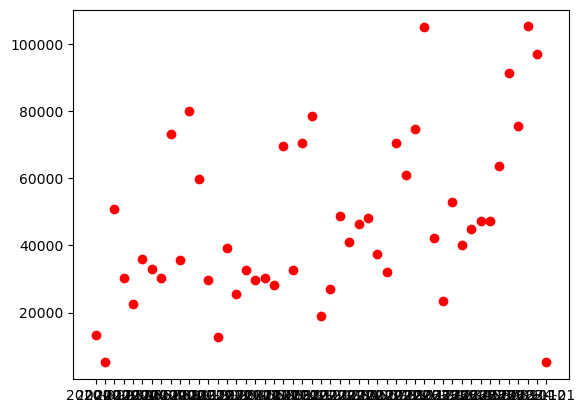

In [10]:
plt.scatter(sales_by_year.index,sales_by_year.values,color = 'red')


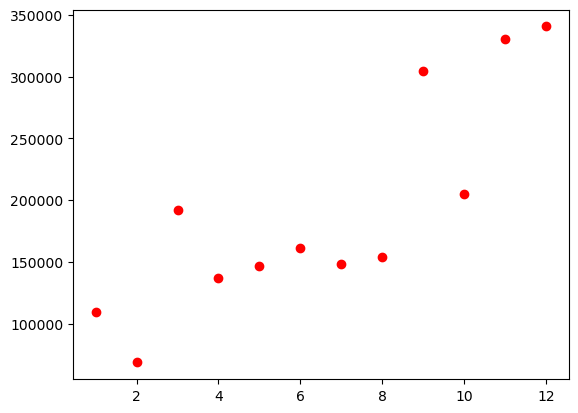

In [12]:
plt.scatter(sales_by_month.index,sales_by_month.values,color = 'red')

In [13]:
sales_by_month.head()

month
1    109456.6894
2     68546.4724
3    191665.3060
4    136953.6968
5    146361.9499
Name: sales, dtype: float64

In [14]:
df3 = sales_by_month_df[sales_by_month_df.sales <500]
df4 = sales_by_month_df[sales_by_month_df.sales > 0]
df4

,month,sales
0,1,109456.6894
1,2,68546.4724
2,3,191665.3060
3,4,136953.6968
4,5,146361.9499
5,6,161335.7057
6,7,148170.6410
7,8,154153.1555
8,9,304631.1559
9,10,204727.0530


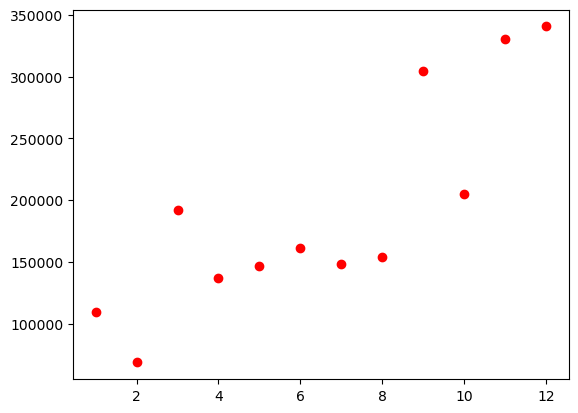

In [15]:
plt.scatter(df4.month,df4.sales,color = 'red',label = 'sales')